# Projeto - Questao 03

### Avaliação da Disciplina

<b>Julio Cesar Gonçalves Sales</b>

<b>Victor Medeiros Outtes Alves</b>

<b>Disciplina:</b> Computação Evolucionária e Inteligência de Enxames

![image.png](img/q3.png)

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit, KFold
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools
from deap import algorithms
import pylab as pl
import operator
import random
import numpy
import math
import copy
import matplotlib.pyplot as plt
random.seed(100)

### Delimitação do espaco de busca

In [2]:
cmin = 2e-15
cmax = 2e3
gmin = 2e-5
gmax = 2e13

### Leitura da base: DIGITS
A base escolhida para esta questão foi a DIGITS. É uma base de classificação de dígitos manuscritos, consistindo em 10 classes.

In [3]:
digits = datasets.load_digits()
Y = digits.target
X = digits.data

### Função de fitness
A função de fitness será um treinamento e avaliação média de um classificador SVM utilizando validação cruzada 3-fold

In [4]:
def evaluation(individuo):
    c = individuo[0]
    gamma = individuo[1]
    classificador = svm.SVC(decision_function_shape='ovo', C=c,gamma=gamma)
    
    scores = []
    support_vectors = []
    kfold = KFold(n_splits=3)
    for k, (treinamento,teste) in enumerate(kfold.split(X,Y)):
        classificador.fit(X[treinamento], Y[treinamento])
        score = classificador.score(X[teste], Y[teste])
        scores.append(score)
        support_vectors.append(sum(classificador.n_support_))
    
    return numpy.mean(scores), numpy.mean(support_vectors),

### Plotar gráfico de Pareto

In [5]:
def plot(pareto):
    x_values = []
    y_values = []
    for individual in pareto:
        fitnesses = toolboxGA.evaluate(individual)
        x_values.append(fitnesses[0])
        y_values.append(fitnesses[1])
    
    plt.plot(x_values, y_values, '.')
    plt.ylabel('SUPPORT VECTORS')
    plt.xlabel('SCORE')
    plt.show()

### Algoritmo Genético

#### Crossover e Mutação adaptados ao problema

In [6]:
def crossover(ind1,ind2):
    temp = copy.deepcopy(ind1)
    ind1[0] = ind2[0]
    ind2[0] = temp[0]
    return ind1,ind2,

In [7]:
def mutacao(individual, indpb):
    mu_c = numpy.mean([cmin,cmax])
    mu_gamma = numpy.mean([gmin,gmax])
    sigma_c = numpy.std([cmin,cmax])
    sigma_gamma = numpy.std([gmin,gmax])
    #MU
    if random.random() > indpb:
        individual[0] += random.gauss(mu_c, sigma_c)
        if individual[0] < cmin:
            individual[0] = cmin
        elif individual[0] > cmax:
            individual[0] = cmax
            
    #GAMMA
    if random.random() > indpb:
        individual[1] += random.gauss(sigma_c, sigma_gamma)
        if individual[1] < gmin:
            individual[1] = gmin
        elif individual[1] > gmax:
            individual[1] = gmax
    return individual,

#### Toolbox do GA

In [8]:
creator.create("FitnessGA", base.Fitness, weights=(1.0,-1.0,))
creator.create("Individual", list, fitness=creator.FitnessGA)
toolboxGA = base.Toolbox()
toolboxGA.register("attr_c", random.uniform, cmin, cmax)
toolboxGA.register("attr_gamma", random.uniform, gmin, gmax)
toolboxGA.register("individual", tools.initCycle, creator.Individual, (toolboxGA.attr_c, toolboxGA.attr_gamma), 1)
toolboxGA.register("population", tools.initRepeat, list, toolboxGA.individual)
toolboxGA.register("evaluate", evaluation)
toolboxGA.register("mate", crossover)
toolboxGA.register("mutate", mutacao, indpb=0.25)
toolboxGA.register("select", tools.selNSGA2)

#### Definições do GA

In [9]:
def GA():
    MU = 100
    LAMBDA = 100
    pop = toolboxGA.population(n=20)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    pop, log = algorithms.eaMuPlusLambda(population=pop, toolbox=toolboxGA, mu=MU, lambda_=LAMBDA, 
                                         cxpb=0.5, mutpb=0.5, ngen=20, stats=stats,
                                         halloffame=hof, verbose=True)
    return hof,log

### Execução do código

gen	nevals	avg    	std    	min     	max 
0  	20    	599.049	598.951	0.097941	1198
1  	100   	578.452	592.104	0.097941	1198
2  	100   	541.372	577.738	0.097941	1198
3  	100   	475.426	545.044	0.097941	1198
4  	100   	355.958	456.584	0.097941	1198
5  	100   	187.133	186.187	0.946021	374.333
6  	100   	187.123	186.177	0.946021	374.333
7  	100   	187.105	186.159	0.946021	374.333
8  	100   	187.093	186.147	0.946021	377.667
9  	100   	187.066	186.121	0.946021	377.667
10 	100   	187.132	186.187	0.946021	378.667
11 	100   	187.193	186.248	0.946021	378.667
12 	100   	187.332	186.388	0.946021	378.667
13 	100   	187.525	186.581	0.946021	378.667
14 	100   	187.872	186.928	0.946021	378.667
15 	100   	187.661	186.713	0.946578	377.667
16 	100   	187.694	186.747	0.946578	377.667
17 	100   	187.759	186.814	0.946578	386.333
18 	100   	187.749	186.803	0.946578	381    
19 	100   	188.089	187.183	0.946578	429.667
20 	100   	188.184	187.279	0.946578	429.667


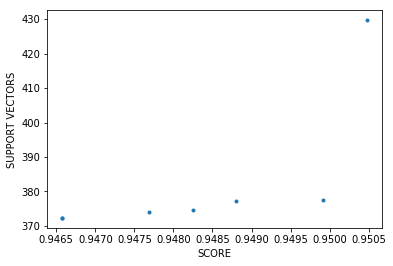

In [10]:
if __name__ == "__main__":
    resultsGA = GA()
    plot(resultsGA[0])